# Importing Libraries

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database connection

In [2]:
connection=sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [4]:
cursor.execute("""select name from sqlite_master where type='table';""")
print('List of tables present in the database')
table_list=[table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [8]:
aircrafts_data=pd.read_sql_query("select * from aircrafts_data",connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [7]:
aircrafts_data.shape

(9, 3)

In [9]:
airports_data=pd.read_sql_query("select * from airports_data",connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [10]:
boarding_passes=pd.read_sql_query("select * from boarding_passes",connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [11]:
bookings=pd.read_sql_query("select * from bookings",connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [12]:
flights=pd.read_sql_query("select * from flights",connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [14]:
seats=pd.read_sql_query("select * from seats",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [15]:
ticket_flights=pd.read_sql_query("select * from ticket_flights",connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [16]:
tickets=pd.read_sql_query("select * from tickets",connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [21]:
for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [23]:
for table in table_list:
    print('\ntable: ',table)
    df_table = pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())


table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

###### How many planes have more than 100 seats?

In [24]:
pd.read_sql_query("""select aircraft_code,count(*) as num_seats from seats
group by aircraft_code having num_seats>100""",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


##### How the number of tickets booked and total amount earned changed with the time.

#### for number of tickets booked changes with time

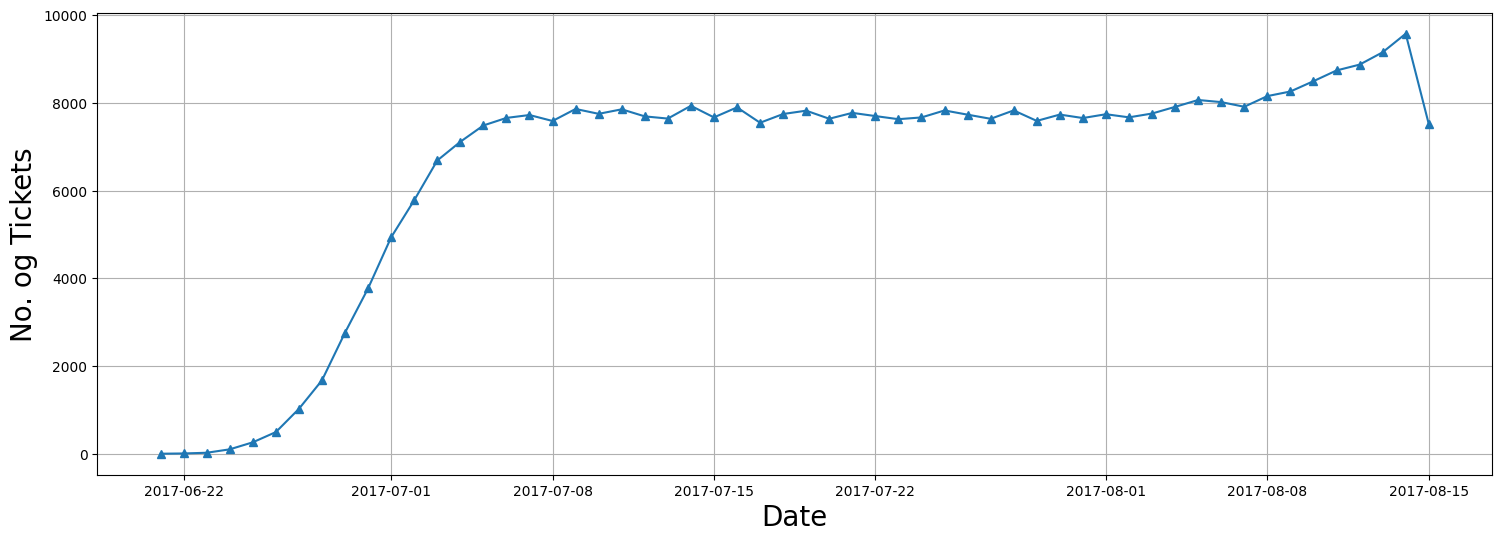

In [29]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                        on tickets.book_ref=bookings.book_ref""",connection)

tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_date'].dt.date
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index, x['date'], marker= '^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('No. og Tickets',fontsize=20)
plt.grid()
plt.show()

#### for total amount earned changed with time

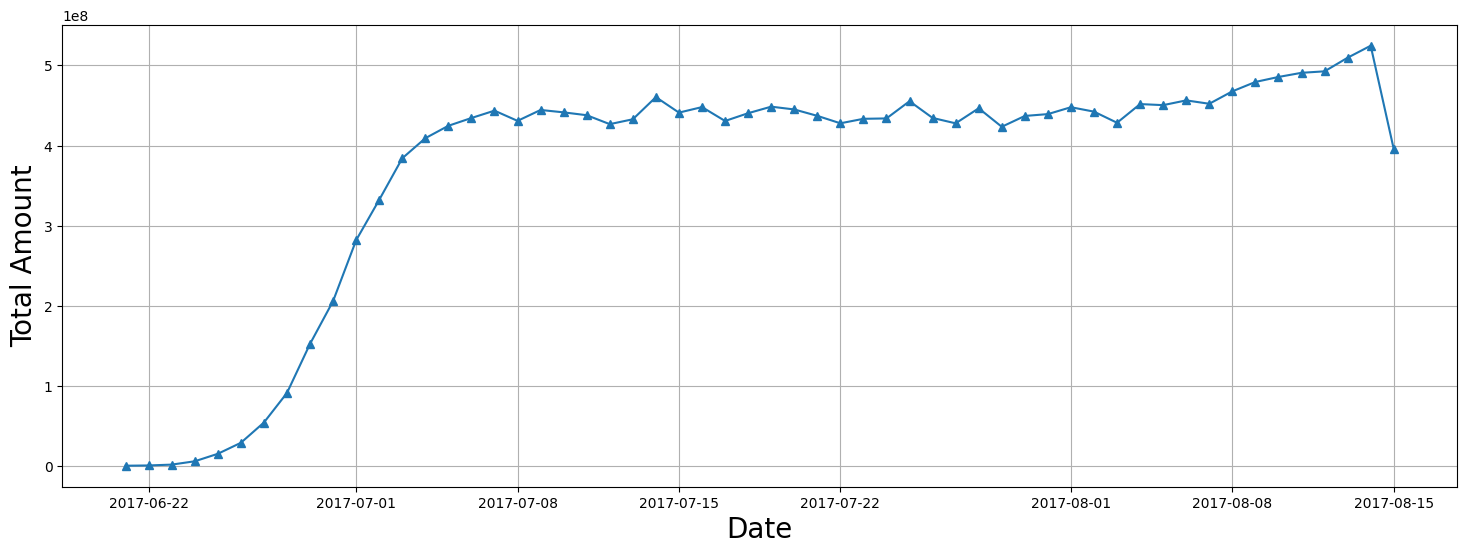

In [31]:
bookings = pd.read_sql_query("""select * from bookings""",connection)
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_date'].dt.date
x = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18,6))
plt.plot(x.index, x['total_amount'], marker= '^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Amount', fontsize=20)
plt.grid()
plt.show()

##### Calculate the average charges for each aircraft with different fare conditions.

In [35]:
df = pd.read_sql_query("""select fare_conditions,aircraft_code,avg(amount) from ticket_flights join flights on ticket_flights.flight_id=flights.flight_id
                        group by aircraft_code,fare_conditions""",connection)
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

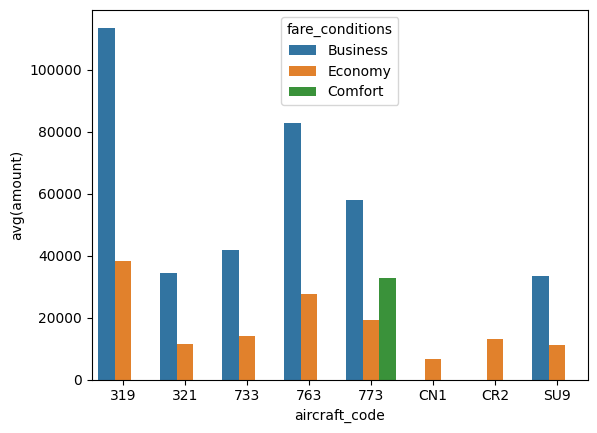

In [37]:
sns.barplot(data=df,x = 'aircraft_code',y ='avg(amount)',hue='fare_conditions')

## Analyzing occupancy rate

##### For each aircraft, calculate the total revenue per year and the average revenue per ticket. 

In [39]:
pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count from (select aircraft_code,count(*) as ticket_count,sum(amount) as total_revenue
                    from ticket_flights join flights on ticket_flights.flight_id=flights.flight_id
                    group by aircraft_code)""",connection)

,aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


##### Calculate the average occupancy per aircraft

In [48]:
occupancy_rate=pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count),b.num_seats,avg(a.seats_count)/b.num_seats as occupancy_rate
        from 
        (
        select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                                inner join flights
                                on boarding_passes.flight_id=flights.flight_id
                                group by aircraft_code,flights.flight_id)as a
                                inner join 
                                (select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b
                                on a.aircraft_code=b.aircraft_code group by a.aircraft_code""",connection
                  )
occupancy_rate

,aircraft_code,avg(a.seats_count),num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


##### Calculate by how much the total amount turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [51]:
occupancy_rate['Inc_occupancy_rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,avg(a.seats_count),num_seats,occupancy_rate,Inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [54]:
pd.set_option("display.float_format",str)

In [55]:
total_revenue=pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                                join flights on ticket_flights.flight_id=flights.flight_id
                                group by aircraft_code""",connection)
occupancy_rate['Inc Total Annual Turnover']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc_occupancy_rate']
occupancy_rate

,aircraft_code,avg(a.seats_count),num_seats,occupancy_rate,Inc_occupancy_rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
